
# **Data Visualization**
### Objectives
- Read the cleaned data and visualize it in order to understand trends, correlations, and to understand which variables influence *insurance charges*.
### Inputs
- The file uses `insurance_cleaned.csv` text file located in the `data\cleaned` folder.
### Outputs
- This notebook generates various plots and relies on `matplotlib`, `seaborn` and `plotly` to generate them.

## Load the libraries and the data
In this section the relevant data analysis libraries and the raw data will be loaded.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')

THe data will be loaded as the variable `insurance`:

In [2]:
insurance = pd.read_csv("../data/cleaned/insurance_cleaned.csv")
print(insurance.shape)
insurance.head()

(1338, 9)


,age,sex,bmi,children,smoker,region,charges,age_bracket,bmi_category
0,19,female,27.900,0,True,southwest,16884.92400,18-25,overweight
1,18,male,33.770,1,False,southeast,1725.55230,18-25,obesity
2,28,male,33.000,3,False,southeast,4449.46200,26-35,obesity
3,33,male,22.705,0,False,northwest,21984.47061,26-35,normal
4,32,male,28.880,0,False,northwest,3866.85520,26-35,overweight


## Overview of charges distribution
This section will provide a brief overview of insurance charges distribution.

In [4]:
insurance['charges'].describe().round(1)

count     1338.0
mean     13270.4
std      12110.0
min       1121.9
25%       4740.3
50%       9382.0
75%      16639.9
max      63770.4
Name: charges, dtype: float64

The distribution will be easier to visualize when presented as a box plot and a swarm plot:

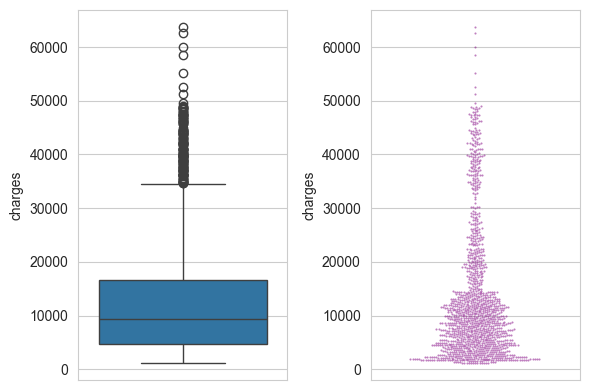

In [7]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(6, 4))
sns.boxplot(y='charges', data=insurance, ax=ax[0])
sns.swarmplot(y='charges', data=insurance, ax=ax[1], color='purple', alpha=0.5, size=1.5)
plt.tight_layout()
plt.show()

As you can see most of the data is clustered towards the bottom, with a significant number of outliers. These outliers will be crucial to understand the data as their presence is likely predicated on the presence of other variables.

Next we will take a closer look at the price distribution with the kde plot overlaid over the histogram:

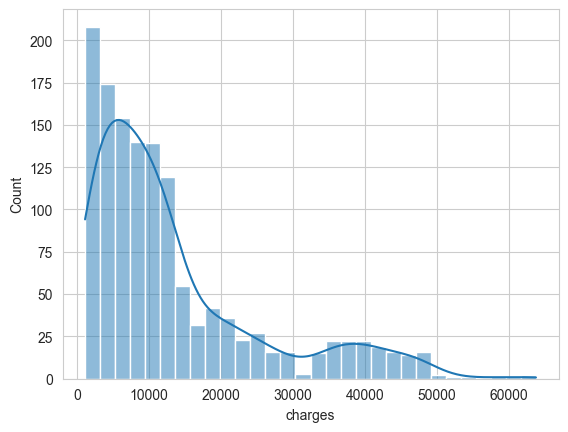

In [8]:
sns.histplot(data=insurance, x='charges', kde=True)
plt.show()

Here we can see that the data shows a kind of mix between right skewed and bimodal data, with the second mode having fewer people. As expected most of the prices are concentrated towards the lower end of the spectrum.